### Parametrized Quantum Circuits

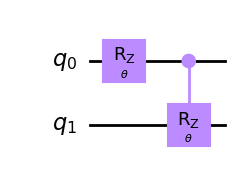

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter


theta = Parameter(r'$\theta$')   # Just one parameter 'θ'

qc = QuantumCircuit(2)

qc.rz(theta, 0)
qc.crz(theta, 0, 1)

qc.draw(output='mpl')

If we want the gates to have different parameters, we can use two Parameters, or we create a ParameterVector, which acts like parameter.

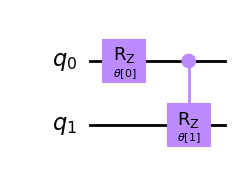

In [2]:
from qiskit.circuit import QuantumCircuit, ParameterVector

theta_list = ParameterVector(r'$\theta$', length = 2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)

qc.draw(output = 'mpl')


#### Circuits with three same Angles

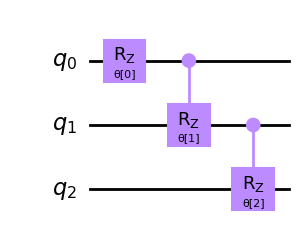

In [3]:
from qiskit.circuit import QuantumCircuit, ParameterVector

theta_list = ParameterVector('θ', length = 3)   # Three parameters

qc = QuantumCircuit(3)  # Quantum circuit with three qubits

qc.rz(theta_list[0], 0)   #apply rotation z operator on first qubit
qc.crz(theta_list[1], 0, 1)     #apply rotation z operator on qubit
qc.crz(theta_list[2], 1, 2)     #apply rotation z operator on 3rd qubit

qc.draw(output = 'mpl')

### ZZFeatureMap circuit

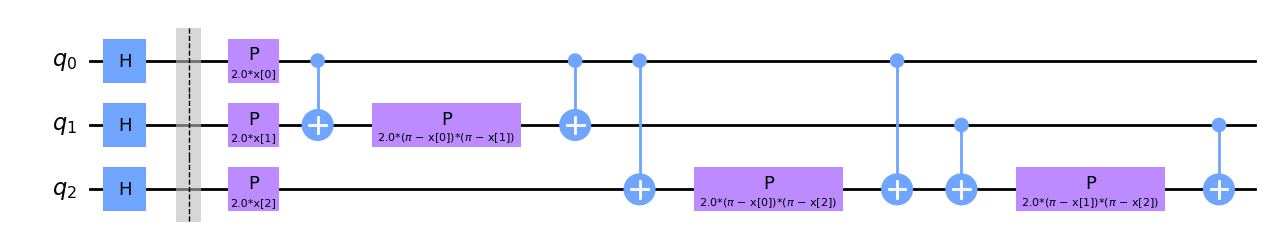

In [4]:
from qiskit.circuit.library import ZZFeatureMap

qc_zz = ZZFeatureMap(3, reps=1, insert_barriers = True, parameter_prefix = 'x', name = 'ZZFeatureMap')

#reps (int) – Specifies how often a block consisting of a rotation layer and entanglement layer is repeated.

qc_zz.decompose().draw(output='mpl')

### Creating TwoLocal Circuit

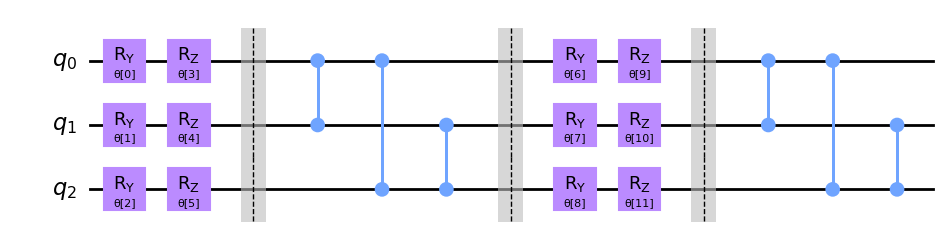

In [5]:
from qiskit.circuit.library import TwoLocal

qc_TwoLocal = TwoLocal(num_qubits = 3, reps = 2, insert_barriers = True, rotation_blocks = ['ry', 'rz'],
                       skip_final_rotation_layer = True, entanglement_blocks = 'cz')

qc_TwoLocal.decompose().draw(output = 'mpl')

* The TwoLocal circuit in Qiskit can create many parameterized circuits 'sca' (shifted-circular-alternating) entanglement is a generalized and modified version of the proposed circuit 14 in Sim et al.. It consists of circular entanglement where the ‘long’ entanglement connecting the first with the last qubit is shifted by one each block.
* Furthermore the role of control and target qubits are swapped every block (therefore alternating).

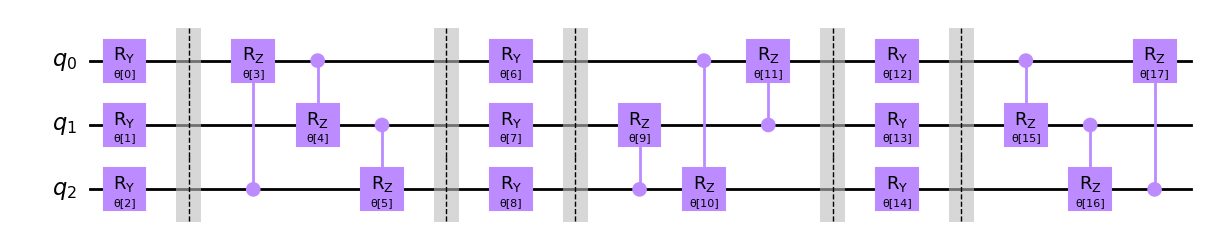

In [6]:
from qiskit.circuit.library import TwoLocal 

qc_TwoLocal = TwoLocal(num_qubits = 3, reps = 3, rotation_blocks = 'ry', entanglement = 'sca', insert_barriers = True,
                       entanglement_blocks = 'crz', skip_final_rotation_layer = True)

qc_TwoLocal.decompose().draw(output = 'mpl')

### Quantum NLocal Circuits

* Here is a NLocal circuit, with a rotation block on 2 qubits and an entanglement block on 4 qubits using linear entanglement:

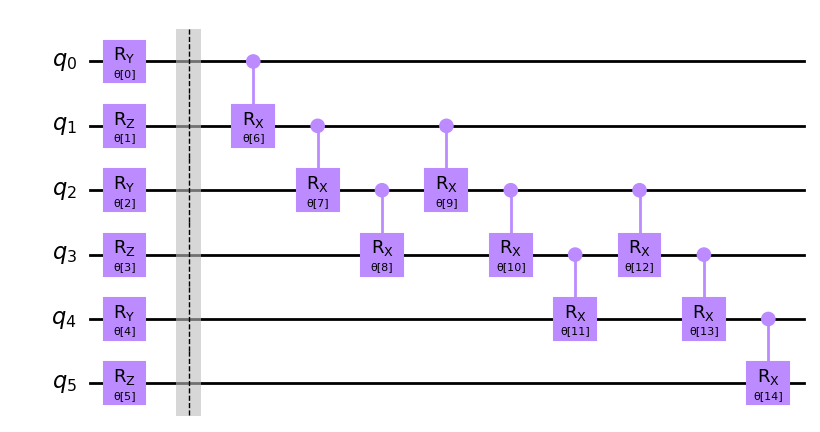

In [7]:
from qiskit.circuit.library import NLocal
from qiskit.circuit import QuantumCircuit, ParameterVector


'rotional Block'
rot = QuantumCircuit(2)
param = ParameterVector('r', 2)
rot.ry(param[0], 0)
rot.rz(param[1], 1)

'Entanglement Block'
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_Nlocal = NLocal(num_qubits = 6, rotation_blocks = rot, entanglement_blocks = ent, entanglement = 'linear',
                   skip_final_rotation_layer = True, insert_barriers = True)

qc_Nlocal.decompose().draw(output = 'mpl')